<a href="https://colab.research.google.com/github/Nathalia-Prada/Sinergia_Bootcamp/blob/main/02_Caso_2_Cinema_Tickets/Punto_2_Caso_2_Cinema_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 2
2.	Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúster.


# Caso 1
# Cinema Tickets


### 2024.11.12


- Es importante perfilar los grupos de cada caso


## Download the dataframe from Kaggle
Install the kaggle python library

In [17]:
!pip install --user kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

import os

# Define the dataset file path
# Este es el nombre del file que estamos explorando en kaggle:
FILE = "arashnic/cinema-ticket"

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [20]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Upload the json file to Google Drive and then copy to the temporary location.

In [21]:
!cp /content/drive/MyDrive/Bootcamp/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [22]:
! chmod 600 ~/.kaggle/kaggle.json

### Competitions and Datasets are the two types of Kaggle data

####1. Download competition data

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

In [23]:
#! kaggle competitions download -c air-heart-disease

To downloaad specific files, instead of the entire data set

In [24]:

#! kaggle competitions download digit-recognizer -f train.csv

#### 2. Download datasets (that are not part of competition)

> Add blockquote



In [25]:
!kaggle datasets download -d $FILE

Dataset URL: https://www.kaggle.com/datasets/arashnic/cinema-ticket
License(s): CC-BY-NC-SA-4.0
  0% 0.00/3.27M [00:00<?, ?B/s]
100% 3.27M/3.27M [00:00<00:00, 93.5MB/s]


#### 3. Unzip files if required

In [26]:
# Find the most recent file in the directory (assuming it is the downloaded file)
import glob
import zipfile

# Find the most recent file in the directory (assuming it is the downloaded file)
downloaded_files = glob.glob("*.zip")  # Looks for zip files in the current directory
if downloaded_files:
    latest_file = max(downloaded_files, key=os.path.getctime)  # Get the most recent file
    print(f"Downloaded file: {latest_file}")

    # Check if it's a zip file and unzip it
    if zipfile.is_zipfile(latest_file):
        print(f"Unzipping {latest_file}...")
        with zipfile.ZipFile(latest_file, 'r') as zip_ref:
            zip_ref.extractall()  # Extract to the current directory
        print(f"{latest_file} unzipped successfully.")
        !rm *.zip
    else:
        print(f"{latest_file} is not a zip file.")
else:
    print("No zip file found.")

Downloaded file: cinema-ticket.zip
Unzipping cinema-ticket.zip...
cinema-ticket.zip unzipped successfully.


#### 4. Load the CSV dataset in a Pandas Dataframe

In [27]:
import pandas as pd

# Find all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Check if any CSV files were found
if csv_files:
    # Load the first CSV file into a DataFrame
    df = pd.read_csv(csv_files[0])

    # Display the info of the DataFrame
    print(f"DataFrame loaded from: {csv_files[0]}")
    print(df.info())
else:
    print("No CSV files found in the current directory.")

DataFrame loaded from: cinemaTicket_Ref.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB
None


In [28]:
df.isnull().sum()

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,125
ticket_price,0
ticket_use,0
capacity,125


In [29]:
# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

film_code       0.000000
cinema_code     0.000000
total_sales     0.000000
tickets_sold    0.000000
tickets_out     0.000000
show_time       0.000000
occu_perc       0.087705
ticket_price    0.000000
ticket_use      0.000000
capacity        0.087705
date            0.000000
month           0.000000
quarter         0.000000
day             0.000000
dtype: float64


# Data Cleaning

In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
film_code,142524.0,NaN,NaN,NaN,1518.985111,36.18445,1471.0,1485.0,1498.0,1556.0,1589.0
cinema_code,142524.0,NaN,NaN,NaN,320.378427,159.701229,32.0,181.0,324.0,474.0,637.0
total_sales,142524.0,NaN,NaN,NaN,12347275.407531,30654858.289367,20000.0,1260000.0,3720000.0,11100000.0,1262819994.0
tickets_sold,142524.0,NaN,NaN,NaN,140.13757,279.758733,1.0,18.0,50.0,143.0,8499.0
tickets_out,142524.0,NaN,NaN,NaN,0.237413,2.923206,0.0,0.0,0.0,0.0,311.0
show_time,142524.0,NaN,NaN,NaN,3.932103,3.056276,1.0,2.0,3.0,5.0,60.0
occu_perc,142399.0,NaN,NaN,NaN,19.965986,22.653445,0.0,3.75,10.35,28.21,147.5
ticket_price,142524.0,NaN,NaN,NaN,81234.599886,33236.599278,483.870968,60000.0,79454.235185,100000.0,700000.0
ticket_use,142524.0,NaN,NaN,NaN,139.900157,279.564935,-219.0,18.0,50.0,143.0,8499.0
capacity,142399.0,NaN,NaN,NaN,854.723605,953.118103,-2.0,276.994486,525.714286,1038.961039,9692.09716


## EDA

### Correlations Matrix

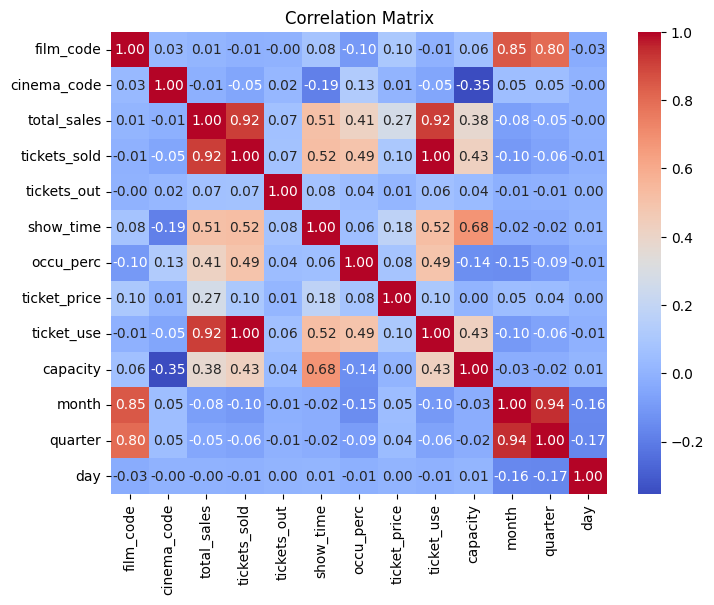

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Description

In [32]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
film_code,142524.0,NaN,NaN,NaN,1518.985111,36.18445,1471.0,1485.0,1498.0,1556.0,1589.0
cinema_code,142524.0,NaN,NaN,NaN,320.378427,159.701229,32.0,181.0,324.0,474.0,637.0
total_sales,142524.0,NaN,NaN,NaN,12347275.407531,30654858.289367,20000.0,1260000.0,3720000.0,11100000.0,1262819994.0
tickets_sold,142524.0,NaN,NaN,NaN,140.13757,279.758733,1.0,18.0,50.0,143.0,8499.0
tickets_out,142524.0,NaN,NaN,NaN,0.237413,2.923206,0.0,0.0,0.0,0.0,311.0
show_time,142524.0,NaN,NaN,NaN,3.932103,3.056276,1.0,2.0,3.0,5.0,60.0
occu_perc,142399.0,NaN,NaN,NaN,19.965986,22.653445,0.0,3.75,10.35,28.21,147.5
ticket_price,142524.0,NaN,NaN,NaN,81234.599886,33236.599278,483.870968,60000.0,79454.235185,100000.0,700000.0
ticket_use,142524.0,NaN,NaN,NaN,139.900157,279.564935,-219.0,18.0,50.0,143.0,8499.0
capacity,142399.0,NaN,NaN,NaN,854.723605,953.118103,-2.0,276.994486,525.714286,1038.961039,9692.09716
